In [24]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve historical data for the last 10 years
ticker = "QQQ"
stock = yf.Ticker(ticker)
history = stock.history(period="10y")

# Calculate daily returns
prices = history['Close']
returns = prices.pct_change().dropna()


In [16]:
def calculate_volatility(returns, period=252):
    # Calculate volatility
    volatility = returns.std() * np.sqrt(period)  # Assuming 252 trading days in a year
    return volatility


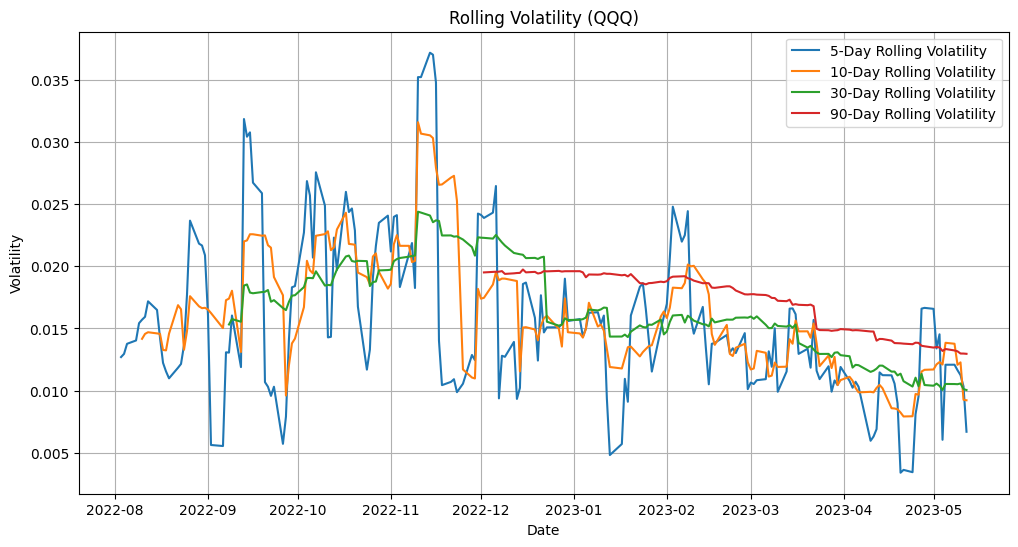

In [20]:
# Calculate rolling volatilities for different periods

sample = returns[-200:]

rolling_5d = sample.rolling(window=5).apply(calculate_volatility,args=(1,))
rolling_10d = sample.rolling(window=10).apply(calculate_volatility, args=(1,))
rolling_30d = sample.rolling(window=30).apply(calculate_volatility, args=(1,))
rolling_90d = sample.rolling(window=90).apply(calculate_volatility, args=(1,))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(sample.index, rolling_5d, label='5-Day Rolling Volatility')
plt.plot(sample.index, rolling_10d, label='10-Day Rolling Volatility')
plt.plot(sample.index, rolling_30d, label='30-Day Rolling Volatility')
plt.plot(sample.index, rolling_90d, label='90-Day Rolling Volatility')
plt.title(f"Rolling Volatility ({ticker})")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

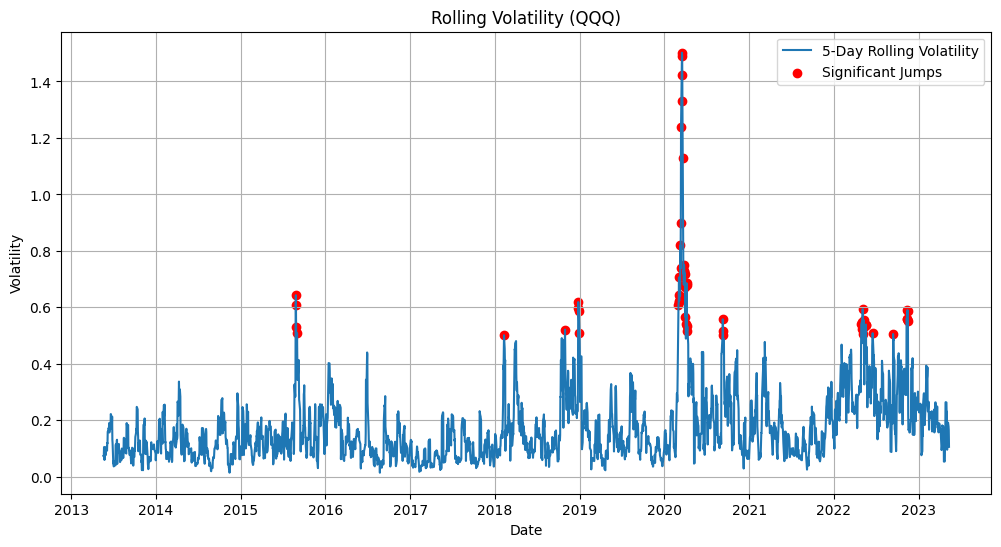

Significant Jumps in 5-Day Rolling Volatility:
          Date Day of the Week
0   2015-08-26       Wednesday
1   2015-08-27        Thursday
2   2015-08-28          Friday
3   2015-09-01         Tuesday
4   2018-02-09          Friday
5   2018-10-30         Tuesday
6   2018-12-26       Wednesday
7   2018-12-27        Thursday
8   2018-12-28          Friday
9   2018-12-31          Monday
10  2020-03-02          Monday
11  2020-03-03         Tuesday
12  2020-03-04       Wednesday
13  2020-03-05        Thursday
14  2020-03-06          Friday
15  2020-03-09          Monday
16  2020-03-10         Tuesday
17  2020-03-11       Wednesday
18  2020-03-12        Thursday
19  2020-03-13          Friday
20  2020-03-16          Monday
21  2020-03-17         Tuesday
22  2020-03-18       Wednesday
23  2020-03-19        Thursday
24  2020-03-20          Friday
25  2020-03-23          Monday
26  2020-03-24         Tuesday
27  2020-03-25       Wednesday
28  2020-03-26        Thursday
29  2020-03-27         

In [26]:

rolling_5d = returns.rolling(window=5).apply(calculate_volatility, args=(1,))
# Identify significant jumps in 5-day rolling volatility
threshold = 0.5  # Customize the threshold as needed
significant_jumps = rolling_5d[rolling_5d > threshold]

# Extract the dates and day of the week for significant jumps
significant_dates = significant_jumps.index.strftime("%Y-%m-%d")
significant_days = significant_jumps.index.strftime("%A")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(history.index[1:], rolling_5d, label='5-Day Rolling Volatility')
plt.scatter(significant_jumps.index, significant_jumps, color='r', marker='o', label='Significant Jumps')
plt.title(f"Rolling Volatility ({ticker})")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

# Display the dates and corresponding day of the week for significant jumps
significant_data = pd.DataFrame({'Date': significant_dates, 'Day of the Week': significant_days})
print("Significant Jumps in 5-Day Rolling Volatility:")
print(significant_data)

In [31]:
significant_data['Day of the Week'].value_counts()

Day of the Week
Wednesday    12
Thursday     12
Tuesday      12
Friday       11
Monday       10
Name: count, dtype: int64